Loading Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

warnings.filterwarnings('ignore')

Data Loading and Cleaning

In [8]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df = df.dropna(axis=1)

if 'v1' in df.columns and 'v2' in df.columns:
    df.columns = ['label', 'message']

print(df.shape)
df.head()

(5572, 2)


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Exploring Data - Visualization

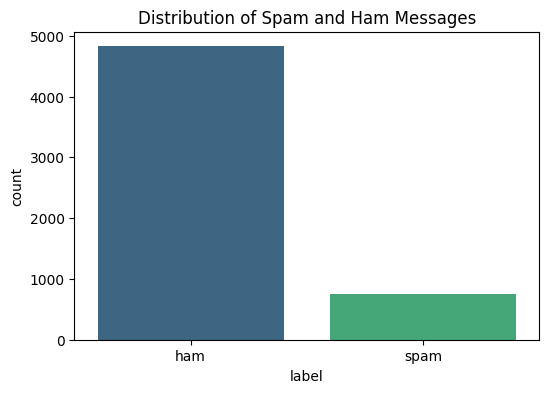

label
ham     4825
spam     747
Name: count, dtype: int64


In [3]:
plt.figure(figsize=(6, 4))
sb.countplot(x='label', data=df, palette='viridis')
plt.title('Distribution of Spam and Ham Messages')
plt.show()

print(df['label'].value_counts())

Preprocessing

In [4]:
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

X = df['message']
y = df['label_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print(f"Training Data Size: {X_train_vec.shape}")
print(f"Testing Data Size: {X_test_vec.shape}")

Training Data Size: (4457, 7735)
Testing Data Size: (1115, 7735)


Training Model - Logistic Regression 

Classification Report:
              precision    recall  f1-score   support

         Ham       0.98      1.00      0.99       965
        Spam       0.99      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



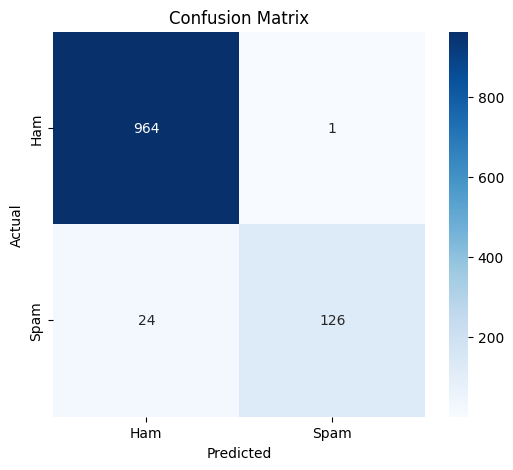

In [9]:
model = LogisticRegression()
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))

plt.figure(figsize=(6, 5))

cm = confusion_matrix(y_test, y_pred)
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Conclusion

Text to Numbers (NLP): We used CountVectorizer to transform raw text into numerical vectors so the model could process it.

Logistic Regression: We demonstrated the efficiency of this algorithm for binary classification tasks.

Beyond Accuracy: We learned that for spam detection, Precision and Recall are crucial metrics to minimize false alarms and ensure actual spam is caught.